In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [ ]:
path = "/content/drive/MyDrive/Datasets/car data.csv"
df = pd.read_csv(path)

In [ ]:
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [ ]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [ ]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [ ]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
df.shape

(301, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [ ]:
print(df.Fuel_Type.value_counts())
print(df.Seller_Type.value_counts())
print(df.Transmission.value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


Replacing the Categorical Data

In [ ]:
df.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
df.replace({'Seller_Type':{'Dealer':0,'Individual':1,}},inplace=True)
df.replace({'Transmission':{'Manual':0,'Automatic':1,}},inplace=True)

In [ ]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


<Axes: >

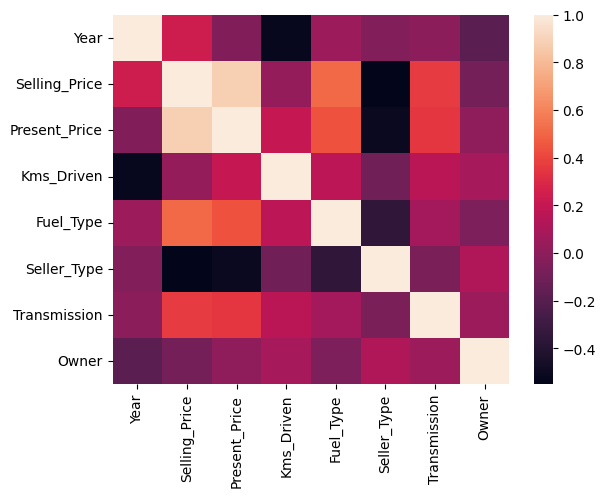

In [ ]:
a = df.drop('Car_Name',axis='columns')
correlation = a.corr()
sns.heatmap(correlation)

<Axes: >

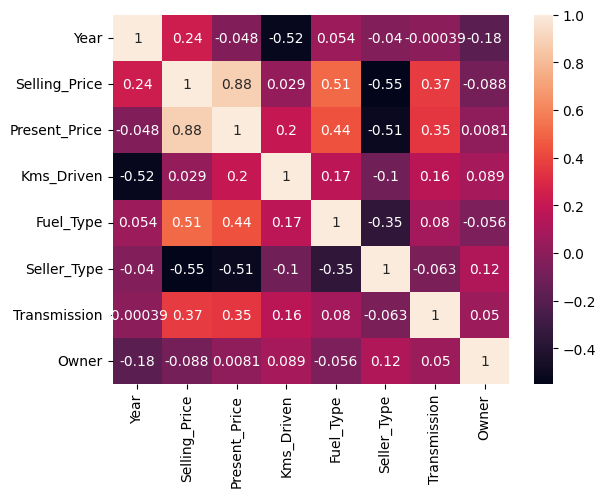

In [ ]:
sns.heatmap(correlation,annot=True)

In [ ]:
from sklearn.model_selection import train_test_split

X = df[['Year','Present_Price','Kms_Driven','Fuel_Type','Seller_Type','Transmission',]]
Y = df[['Selling_Price']]

In [ ]:
print(X)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission
0    2014           5.59       27000          0            0             0
1    2013           9.54       43000          1            0             0
2    2017           9.85        6900          0            0             0
3    2011           4.15        5200          0            0             0
4    2014           6.87       42450          1            0             0
..    ...            ...         ...        ...          ...           ...
296  2016          11.60       33988          1            0             0
297  2015           5.90       60000          0            0             0
298  2009          11.00       87934          0            0             0
299  2017          12.50        9000          1            0             0
300  2016           5.90        5464          0            0             0

[301 rows x 6 columns]


In [ ]:
print(Y)

     Selling_Price
0             3.35
1             4.75
2             7.25
3             2.85
4             4.60
..             ...
296           9.50
297           4.00
298           3.35
299          11.50
300           5.30

[301 rows x 1 columns]


In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1,random_state=2)

In [ ]:
X_train

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission
204,2015,4.430,28282,0,0,0
249,2016,7.600,17000,0,0,0
277,2015,13.600,21780,0,0,0
194,2008,0.787,50000,0,1,0
244,2013,9.400,49000,1,0,0
...,...,...,...,...,...,...
75,2015,6.800,36000,0,0,0
22,2011,8.010,50000,0,0,1
72,2013,18.610,56001,0,0,0
15,2016,10.790,43000,1,0,0


In [ ]:
Y_train

,Selling_Price
204,2.75
249,5.25
277,9.70
194,0.20
244,5.95
...,...
75,3.95
22,4.40
72,7.45
15,7.75


In [ ]:
X_test

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission
99,2010,20.450,50024,1,0,0
161,2014,0.826,23000,0,1,0
89,2014,6.760,40000,0,0,0
30,2012,5.980,51439,1,0,0
232,2015,14.790,12900,0,0,1
290,2014,6.400,19000,0,0,0
35,2011,7.740,49998,2,0,0
7,2015,8.610,33429,1,0,0
183,2013,0.470,21000,0,1,0
13,2015,7.710,26000,0,0,0


In [ ]:
Y_test

,Selling_Price
99,9.65
161,0.45
89,4.75
30,3.10
232,11.45
290,4.50
35,2.95
7,6.50
183,0.27
13,6.10


In [ ]:
from sklearn.linear_model import LinearRegression

m = LinearRegression()
m.fit(X_train,Y_train)
y_prediction = m.predict(X_train)

In [ ]:
error_score = metrics.r2_score(Y_train,y_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8782047343662112


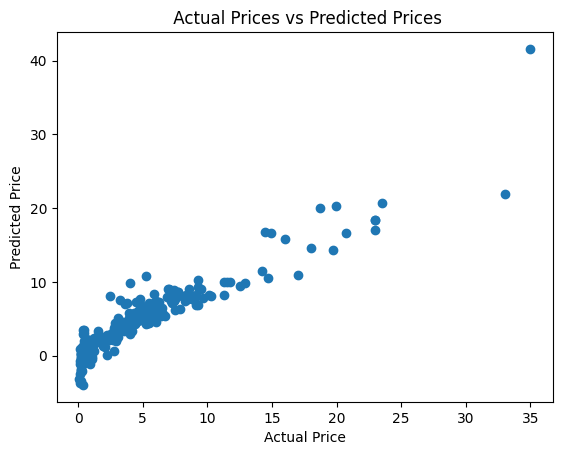

In [ ]:
plt.scatter(Y_train,y_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [ ]:
lin_reg_prediction = m.predict(X_test)
error_score = metrics.r2_score(Y_test,lin_reg_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8498617573093529


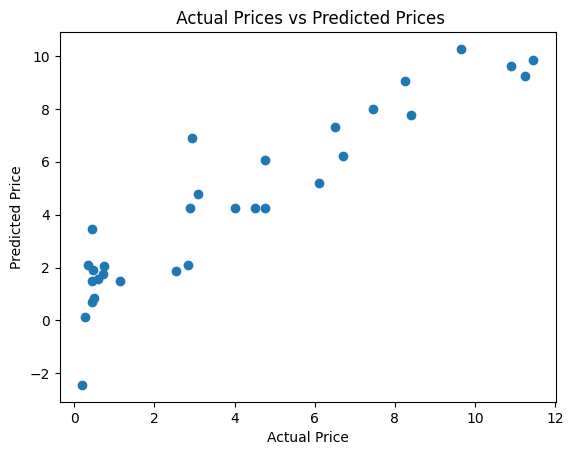

In [ ]:
plt.scatter(Y_test,lin_reg_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [ ]:
from sklearn.linear_model import Lasso

lasso_reg_model = Lasso()

In [ ]:
lasso_reg_model.fit(X_train,Y_train)

Lasso()

In [ ]:
train_data_prediction = lasso_reg_model.predict(X_train)

In [ ]:
lasso_reg_prediction = lasso_reg_model.predict(X_train)
error_score = metrics.r2_score(Y_train,lasso_reg_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8427856123435794


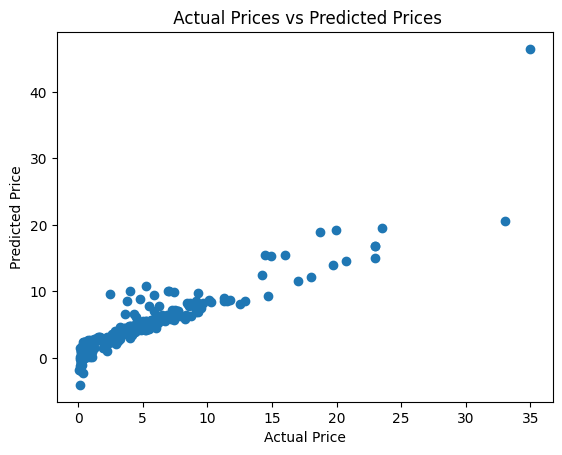

In [ ]:
plt.scatter(Y_train,train_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [ ]:
lasso_reg_prediction = lasso_reg_model.predict(X_test)
error_score = metrics.r2_score(Y_test,lasso_reg_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8709167941173195


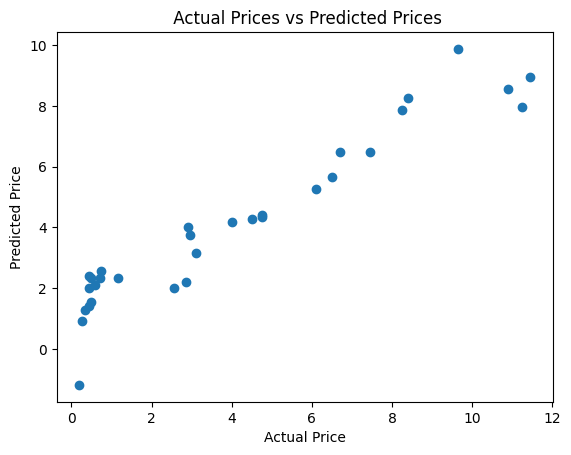

In [ ]:
plt.scatter(Y_test,lasso_reg_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [ ]:
new_data = [[2017,9.75,6800,0,0,0]]
new_data_predicted_price = m.predict(new_data)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
print(new_data_predicted_price[0])

[7.04550622]
